In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing dataset

In [31]:
df = pd.read_csv('dataset_20_12_no_encoder.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     358 non-null    int64  
 1   brand          358 non-null    object 
 2   ram            358 non-null    int64  
 3   storage_ssd    358 non-null    int64  
 4   storage_hdd    358 non-null    int64  
 5   storage_type   358 non-null    object 
 6   cpu_brand      358 non-null    object 
 7   cpu_speed      358 non-null    float64
 8   etat           358 non-null    object 
 9   os             358 non-null    object 
 10  screen_size    358 non-null    float64
 11  gpu            358 non-null    object 
 12  current_price  358 non-null    float64
 13  storage        358 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 39.3+ KB


In [33]:
df = df.drop('Unnamed: 0', axis=1)

Shape of dataset

In [34]:
df.shape

(358, 13)

Brand Exploratory

<ipython-input-36-57a5854759e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='brand',data=df, palette='viridis')


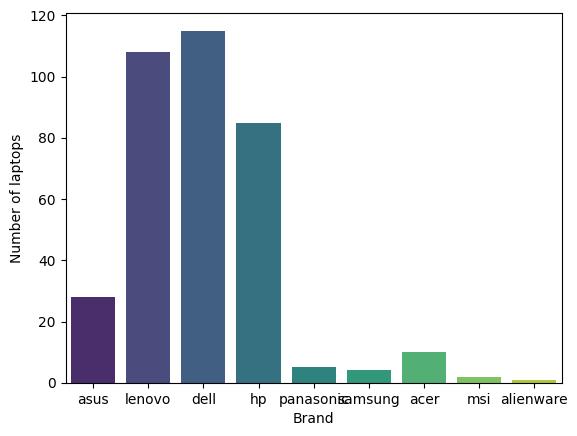

In [36]:
sns.countplot(x='brand',data=df, palette='viridis')

plt.xlabel('Brand')
plt.ylabel('Number of laptops')

plt.show()

Condition Exploratory

<ipython-input-42-99cb645dfda5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='etat',data=df, palette='viridis')


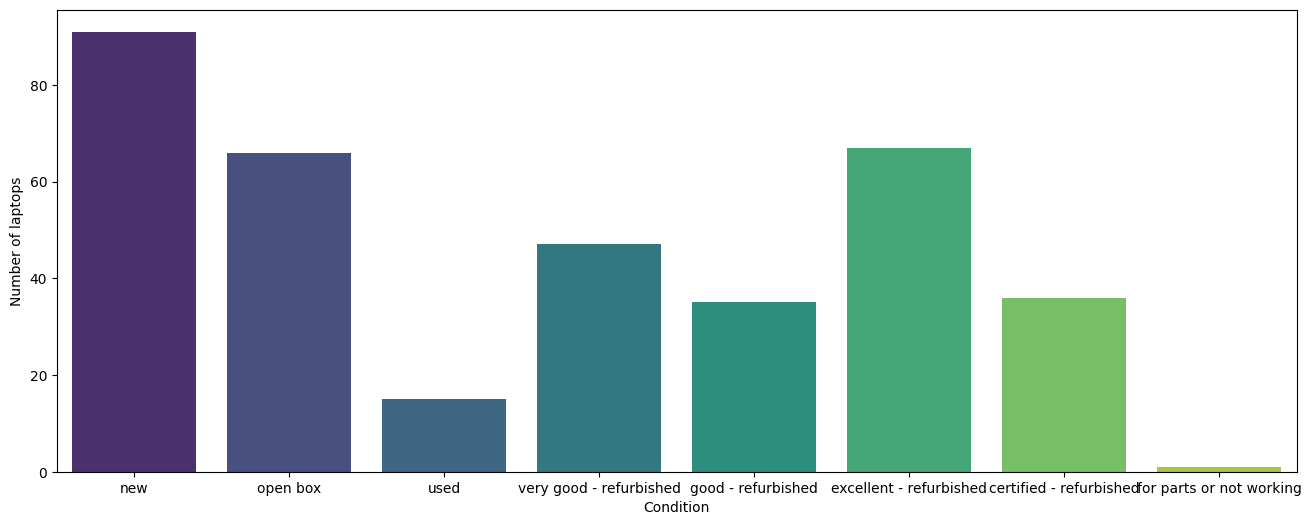

In [42]:
plt.figure(figsize=(16, 6))
sns.countplot(x='etat',data=df, palette='viridis')

plt.xlabel('Condition')
plt.ylabel('Number of laptops')

plt.show()

Operating System Exploratory

<ipython-input-37-4af9567379ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='os',data=df, palette='viridis')


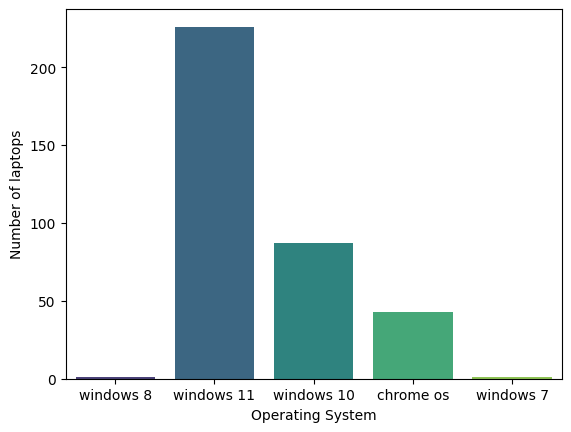

In [37]:
sns.countplot(x='os',data=df, palette='viridis')

plt.xlabel('Operating System')
plt.ylabel('Number of laptops')

plt.show()

RAM exploratory

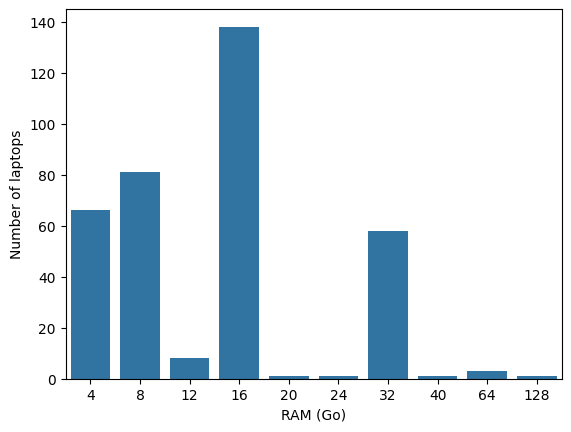

In [6]:
sns.countplot(x='ram',data=df)

plt.xlabel('RAM (Go)')
plt.ylabel('Number of laptops')

plt.show()

In [9]:
df.groupby('ram')['current_price'].mean()

,current_price
ram,
4,126.791515
8,325.609012
12,268.931250
16,474.087391
20,199.990000
24,449.990000
32,590.896034
40,799.990000
64,494.993333


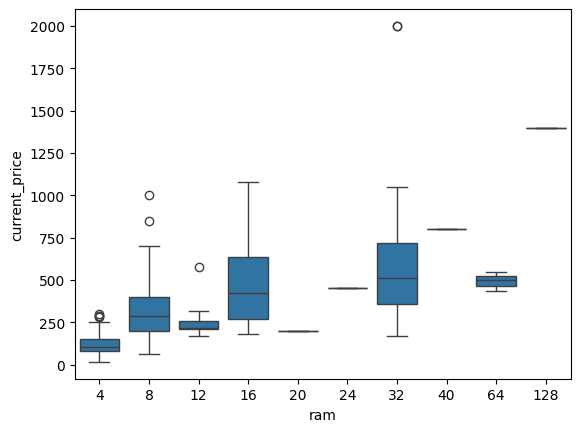

In [10]:
sns.boxplot(x='ram',y="current_price",data=df)
plt.show()

Storage Exploratory

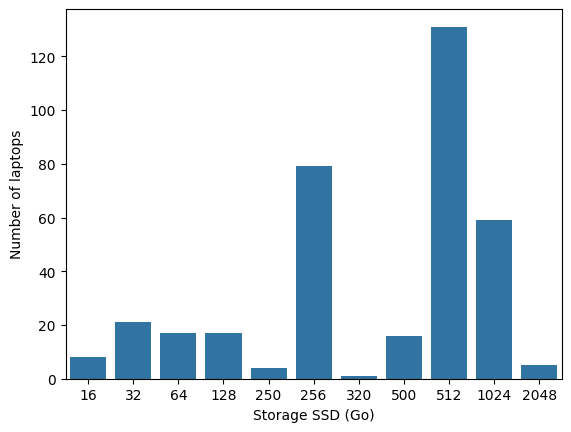

In [7]:
sns.countplot(x='storage_ssd',data=df)

plt.xlabel('Storage SSD (Go)')
plt.ylabel('Number of laptops')

plt.show()

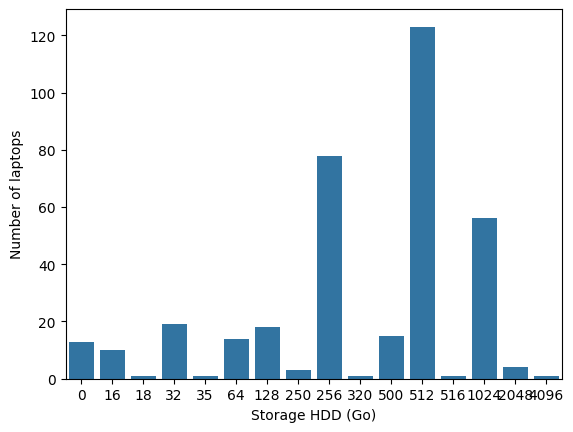

In [8]:
sns.countplot(x='storage_hdd',data=df)

plt.xlabel('Storage HDD (Go)')
plt.ylabel('Number of laptops')

plt.show()

In [11]:
df.groupby('storage_ssd')['current_price'].mean()

,current_price
storage_ssd,
16,69.486250
32,104.679524
64,138.052353
128,192.881176
250,102.242500
256,328.658987
320,44.950000
500,224.101875
512,476.849618


In [12]:
df.groupby('storage_ssd')['current_price'].mean()

,current_price
storage_ssd,
16,69.486250
32,104.679524
64,138.052353
128,192.881176
250,102.242500
256,328.658987
320,44.950000
500,224.101875
512,476.849618


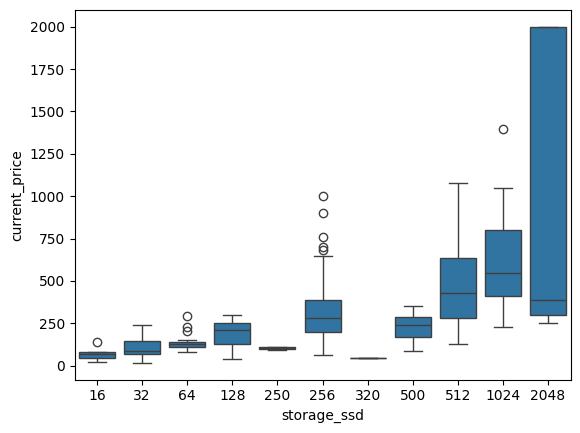

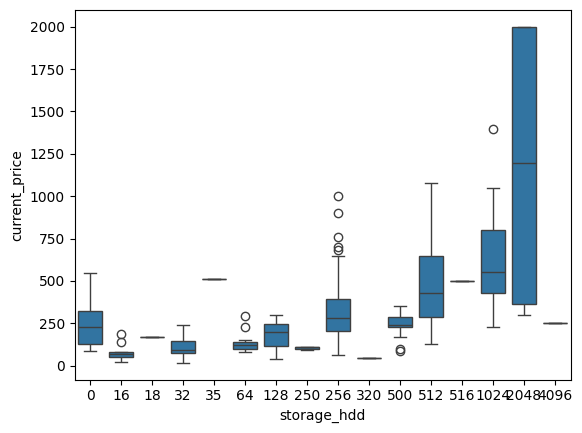

In [13]:
sns.boxplot(x='storage_ssd',y="current_price",data=df)
plt.show()
sns.boxplot(x='storage_hdd',y="current_price",data=df)
plt.show()

Encoding Categorical Variables

In [16]:
from sklearn.preprocessing import LabelEncoder
le_brand = LabelEncoder()
le_cpu_brand = LabelEncoder()
le_etat = LabelEncoder()
le_os = LabelEncoder()
le_gpu = LabelEncoder()
le_storage_type = LabelEncoder()

df.brand = le_brand.fit_transform(df.brand)
df.etat = le_etat.fit_transform(df.etat)
df.os = le_os.fit_transform(df.os)
df.cpu_brand = le_cpu_brand.fit_transform(df.cpu_brand)
df.gpu = le_gpu.fit_transform(df.gpu)
df.storage_type = le_storage_type.fit_transform(df.storage_type)

About the data

In [30]:
df.describe()

,brand,ram,storage_ssd,storage_hdd,storage_type,cpu_brand,cpu_speed,etat,os,screen_size,gpu,current_price,storage
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.00000,358.000000,358.000000,358.000000,358.000000
mean,3.801676,15.296089,478.592179,462.801676,2.589385,0.910615,2.434888,3.594972,1.52514,14.351955,2.170391,393.642458,941.393855
std,1.303861,11.786929,355.350281,401.795044,1.005085,0.413835,1.062843,2.187481,0.71650,1.545621,1.135876,275.141618,737.184198
min,0.000000,4.000000,16.000000,0.000000,0.000000,0.000000,1.010000,0.000000,0.00000,2.000000,0.000000,16.500000,32.000000
25%,3.000000,8.000000,256.000000,256.000000,3.000000,1.000000,1.700000,1.000000,1.00000,14.000000,2.000000,205.742500,512.000000
50%,4.000000,16.000000,512.000000,512.000000,3.000000,1.000000,2.250000,4.000000,2.00000,14.000000,2.000000,299.990000,1024.000000
75%,5.000000,16.000000,512.000000,512.000000,3.000000,1.000000,2.800000,5.000000,2.00000,15.600000,2.000000,543.327500,1024.000000
max,8.000000,128.000000,2048.000000,4096.000000,4.000000,3.000000,5.200000,7.000000,4.00000,17.300000,6.000000,2000.000000,6144.000000


Correlation Matrix

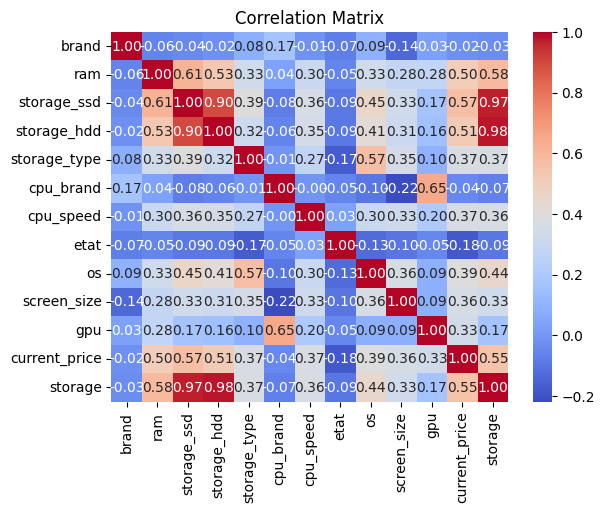

In [17]:
cm = df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We see that brand and cpu brand have a low correlation with the price so we should eliminating them during model creation